### This is a follow up work on my previous Hackathon. In a previous work, I did some data Analysis, KPI finding and decision making. The goal of this part is to focus on quality of sleep. I want to create supervised learning model to predict sleep quality and better recomment users if it happens that their sleep quality is less the the KPI values.

#### Dataset Overview:
#### The Sleep Health and Lifestyle Dataset comprises 400 rows and 13 columns, covering a wide range of variables related to sleep and daily habits. It includes details such as gender, age, occupation, sleep duration, quality of sleep, physical activity level, stress levels, BMI category, blood pressure, heart rate, daily steps, and the presence or absence of sleep disorders.

#### Key Features of the Dataset:
#### Comprehensive Sleep Metrics: Explore sleep duration, quality, and factors influencing sleep patterns.
#### Lifestyle Factors: Analyze physical activity levels, stress levels, and BMI categories.
#### Cardiovascular Health: Examine blood pressure and heart rate measurements.
#### Sleep Disorder Analysis: Identify the occurrence of sleep disorders such as Insomnia and Sleep Apnea.

In [7]:
import numpy as np
import pandas as pd
import warnings
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sqlalchemy import create_engine
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
from datetime import datetime
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score

In [2]:
sleep_data=pd.read_csv("/home/angelo/Desktop/THINKFUL DATA SCIENCE FLEX/Hackaton/Sleep_health_and_lifestyle_dataset.csv")

In [3]:
sleep_data.head(5)

,Person ID,Gender,Age,Occupation,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,BMI Category,Blood Pressure,Heart Rate,Daily Steps,Sleep Disorder
0,1,Male,27,Software Engineer,6.1,6,42,6,Overweight,126/83,77,4200,None
1,2,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
2,3,Male,28,Doctor,6.2,6,60,8,Normal,125/80,75,10000,None
3,4,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea
4,5,Male,28,Sales Representative,5.9,4,30,8,Obese,140/90,85,3000,Sleep Apnea


Sleep quality is the target. As the data has already been clearned up, let's look at how it changes based on other parameters and lean on to the feature engineering step.

### Exploratory Data Analysis and Feature Engineering

#### Quality of sleep with Numerical variables

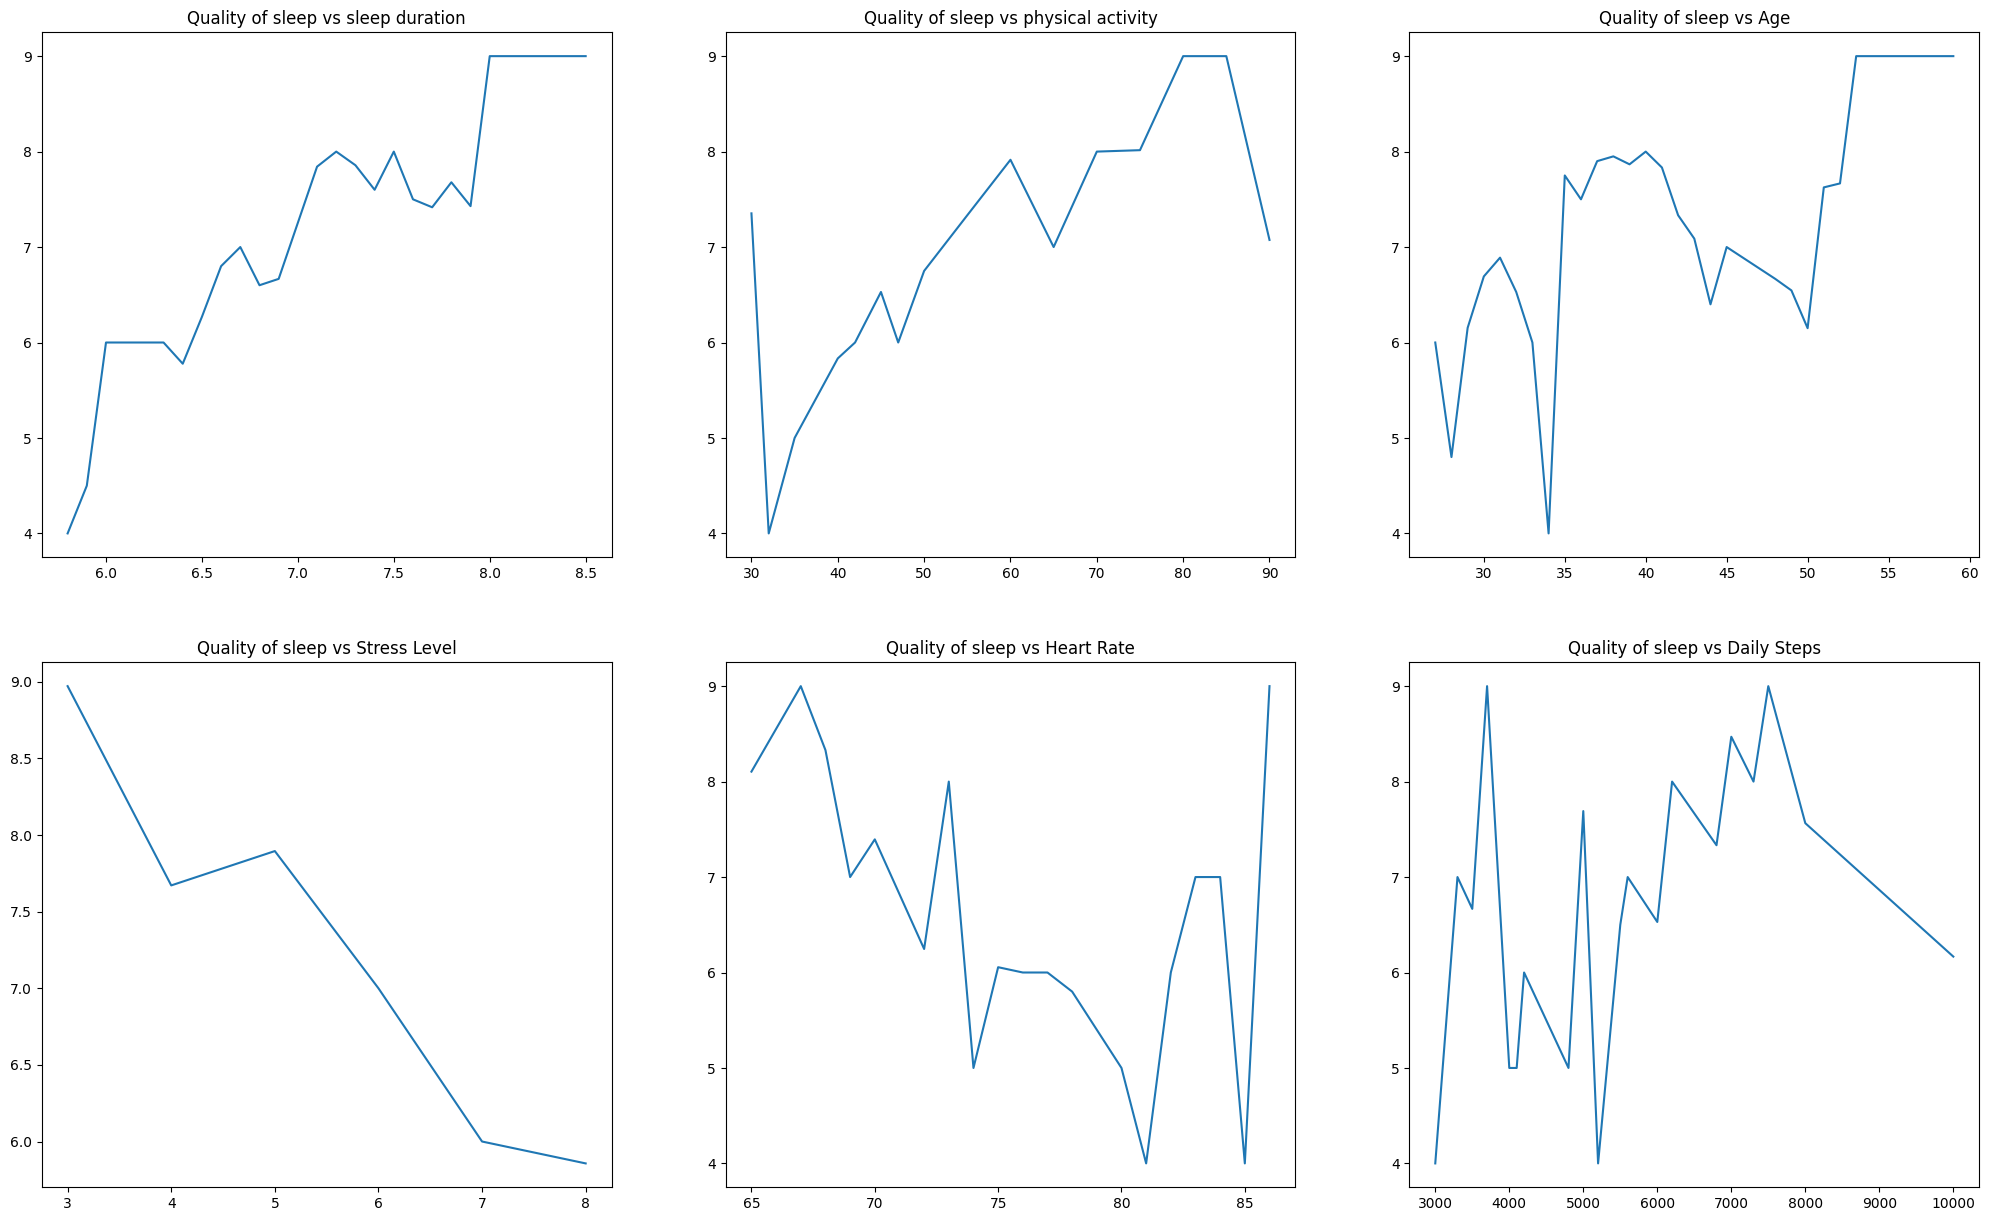

In [4]:
plt.figure(figsize=(25,15))
plt.subplot(2,3,1)
DAT=sleep_data[['Sleep Duration','Quality of Sleep']].groupby('Sleep Duration').mean()
plt.plot(DAT)
plt.title('Quality of sleep vs sleep duration')

plt.subplot(2,3,2)
DAT=sleep_data[['Physical Activity Level','Quality of Sleep']].groupby('Physical Activity Level').mean()
plt.plot(DAT)
plt.title('Quality of sleep vs physical activity')

plt.subplot(2,3,3)
DAT=sleep_data[['Age','Quality of Sleep']].groupby('Age').mean()
plt.plot(DAT)
plt.title('Quality of sleep vs Age')

plt.subplot(2,3,4)
DAT=sleep_data[['Stress Level','Quality of Sleep']].groupby('Stress Level').mean()
plt.plot(DAT)
plt.title('Quality of sleep vs Stress Level')

plt.subplot(2,3,5)
DAT=sleep_data[['Heart Rate','Quality of Sleep']].groupby('Heart Rate').mean()
plt.plot(DAT)
plt.title('Quality of sleep vs Heart Rate')

plt.subplot(2,3,6)
DAT=sleep_data[['Daily Steps','Quality of Sleep']].groupby('Daily Steps').mean()
plt.plot(DAT)
plt.title('Quality of sleep vs Daily Steps')
plt.show()

They all seem to show strong correlation with quality of sleep. However let's comfirm this by plotting the covariance matrix.

In [5]:
sleep_data.corr()

,Person ID,Age,Sleep Duration,Quality of Sleep,Physical Activity Level,Stress Level,Heart Rate,Daily Steps
Person ID,1.000000,0.990516,0.296305,0.431612,0.149882,-0.394287,-0.225467,0.043844
Age,0.990516,1.000000,0.344709,0.473734,0.178993,-0.422344,-0.225606,0.057973
Sleep Duration,0.296305,0.344709,1.000000,0.883213,0.212360,-0.811023,-0.516455,-0.039533
Quality of Sleep,0.431612,0.473734,0.883213,1.000000,0.192896,-0.898752,-0.659865,0.016791
Physical Activity Level,0.149882,0.178993,0.212360,0.192896,1.000000,-0.034134,0.136971,0.772723
Stress Level,-0.394287,-0.422344,-0.811023,-0.898752,-0.034134,1.000000,0.670026,0.186829
Heart Rate,-0.225467,-0.225606,-0.516455,-0.659865,0.136971,0.670026,1.000000,-0.030309
Daily Steps,0.043844,0.057973,-0.039533,0.016791,0.772723,0.186829,-0.030309,1.000000


Age, sleep duration,stress level, physical activity and heart rate all have strong correlation with "quality of sleep". However, because we want this to be user oriented, we will avoid using heart rate as users usually don't know exactly what is their heart rate unless they checked it at the hospital that day.
For the next steps we will keep: 
#### Age, sleep duration, stress level, physical activity

#### Quality of sleep with Numerical variables

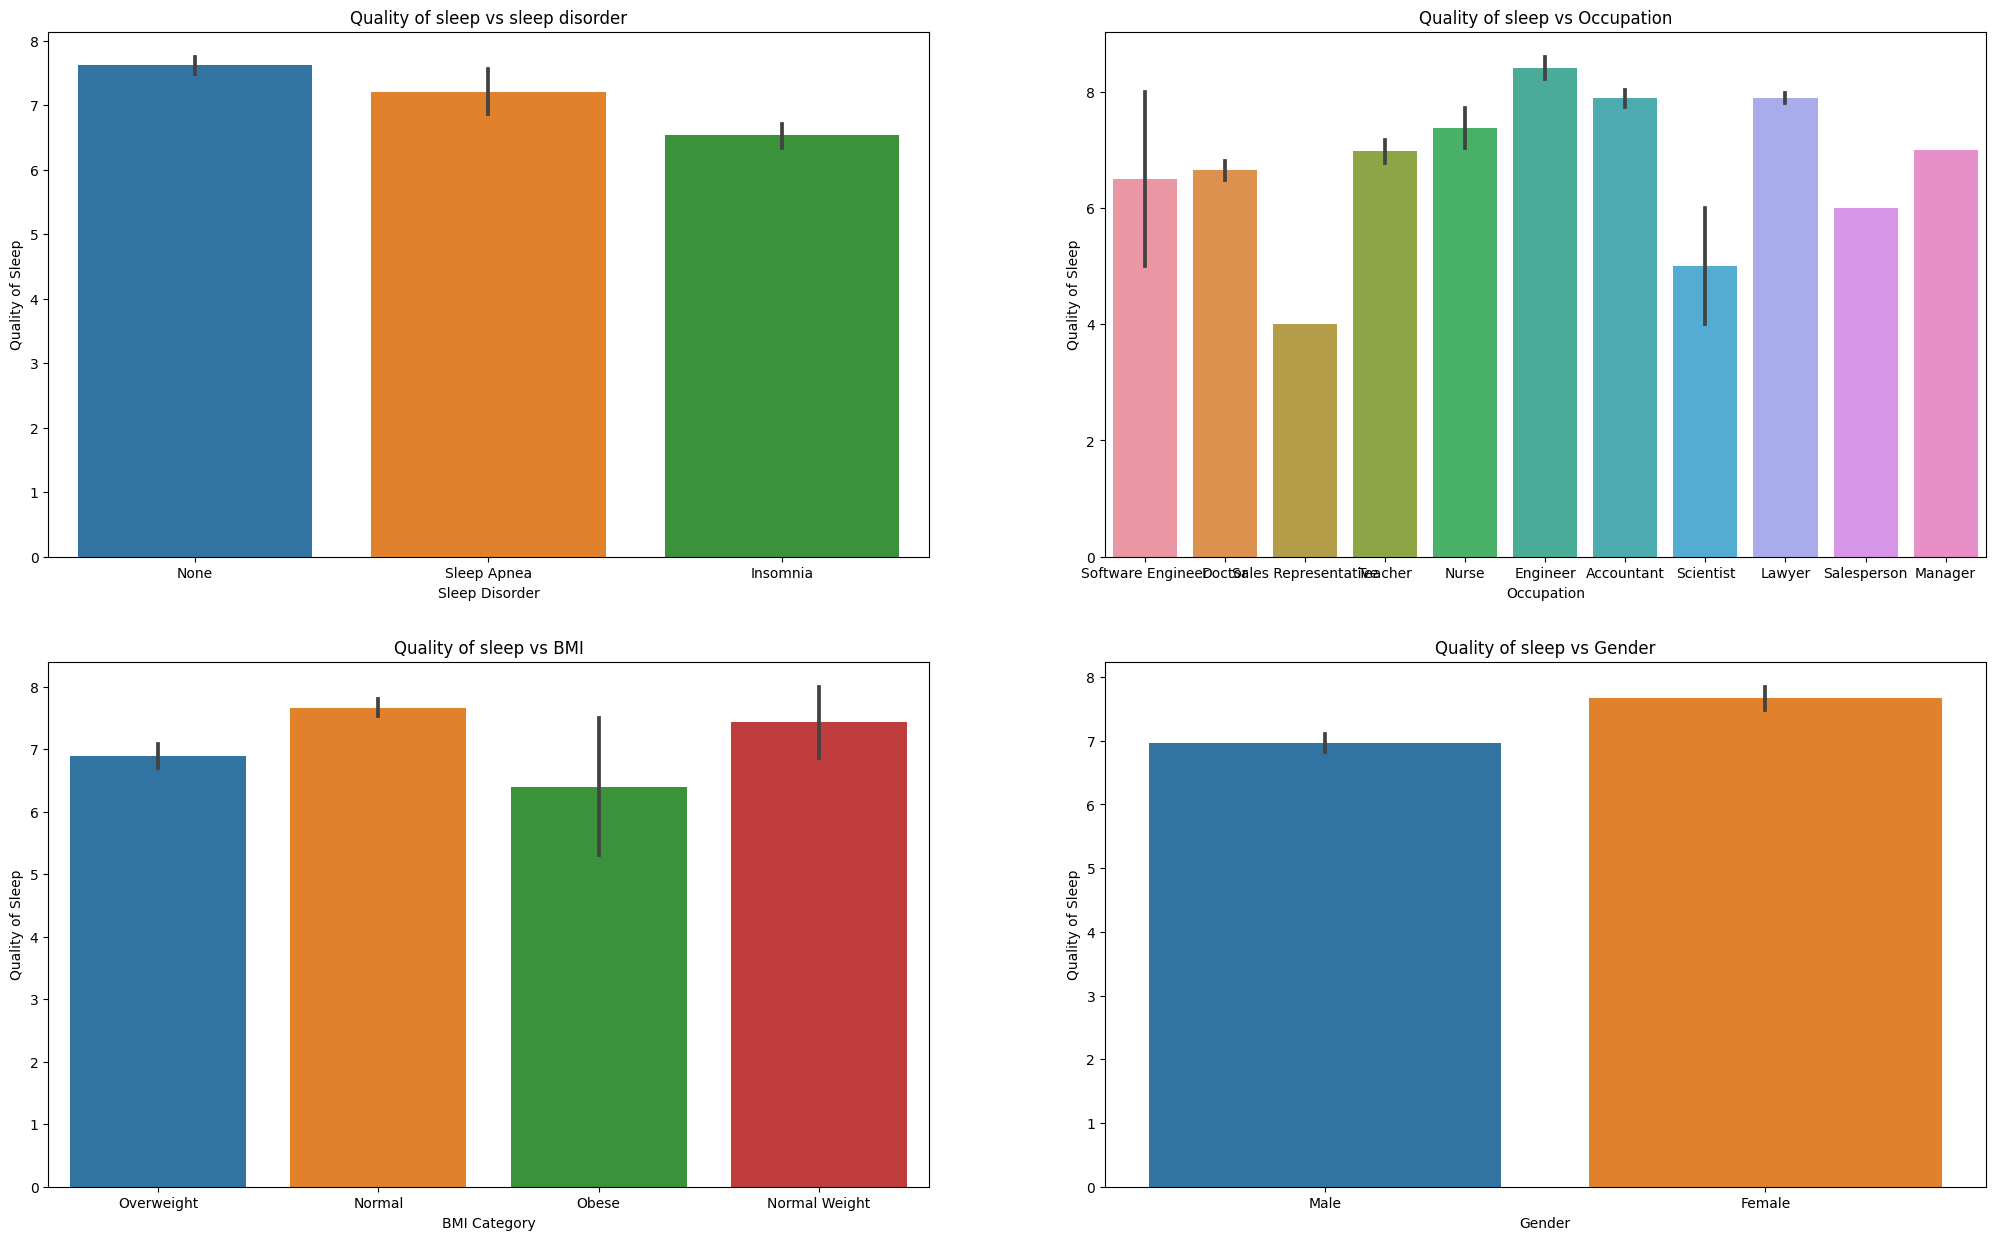

In [6]:
plt.figure(figsize=(25,15))
plt.subplot(2,2,1)
sns.barplot(sleep_data, x="Sleep Disorder", y="Quality of Sleep")
plt.title('Quality of sleep vs sleep disorder')

plt.subplot(2,2,2)
sns.barplot(sleep_data, x="Occupation", y="Quality of Sleep")
plt.title('Quality of sleep vs Occupation')

plt.subplot(2,2,3)
sns.barplot(sleep_data, x="BMI Category", y="Quality of Sleep")
plt.title('Quality of sleep vs BMI')

plt.subplot(2,2,4)
sns.barplot(sleep_data, x="Gender", y="Quality of Sleep")
plt.title('Quality of sleep vs Gender')
plt.show()

Sleep disorder, BMI, Gender and Occupation do not seem to strongly impact the variability of quality of sleep.

### Model implementation (with Age, sleep duration, stress level, physical activity)

#### A Linear regression to predict quality of sleep

In [8]:
X=sleep_data[["Age","Sleep Duration","Stress Level","Physical Activity Level"]]
Y=sleep_data["Quality of Sleep"]
#Estimate Multiple Linear Regression Model Using Scikit-learn on training data.
X_train, X_test, Y_train, Y_test=train_test_split(X,Y,test_size = 0.2, random_state = 465)
model=LinearRegression().fit(X_train, Y_train)
#coefficient of determination
score = model.score(X_train, Y_train)
#intercept
inter=model.intercept_
# coefficients
coefs=model.coef_
# Evaluate the model
y_pred=model.predict(X_test)
RSS= np.sum(np.square(Y_test - y_pred))
var_score=explained_variance_score(Y_test, y_pred)
# Estimate Multiple Linear Regression Model Using Statsmodel on training data
import statsmodels.api as sm
X_train = sm.add_constant(X_train)
results = sm.OLS(Y_train, X_train).fit()
#print(results.summary())
X_test = sm.add_constant(X_test)
y_preds = results.predict(X_test)

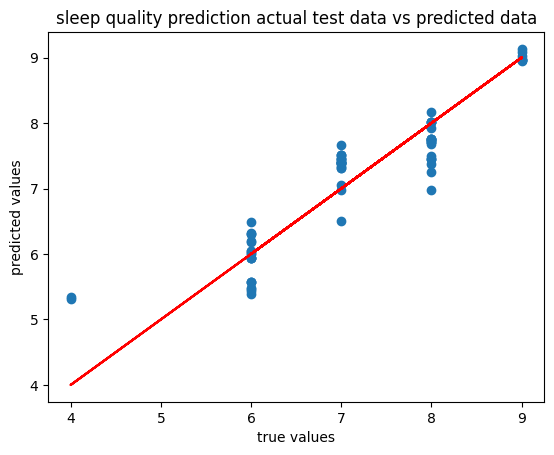

In [9]:
plt.scatter(Y_test, y_pred)
plt.plot(Y_test, Y_test, color="red")
plt.xlabel("true values")
plt.ylabel("predicted values")
plt.title("sleep quality prediction actual test data vs predicted data")
plt.show()